In [1]:
# Imports

import tensorflow as tf
from keras import Model
import matplotlib.pyplot as plt
import cv2
from keras.applications import DenseNet121
from keras.layers import *
from keras.callbacks import *
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

2023-04-30 10:59:26.918346: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-30 10:59:27.185059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-30 10:59:27.186409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 10:59:28.216431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [81]:
for dirpath, dirnames, filenames in os.walk("C:/Users/Jakub/PycharmProjects/Cybertech/data"):
    if len(filenames) != 0:
        print(f"{len(filenames)} images in '{dirpath}'.")

train_dir = "C:/Users/Jakub/PycharmProjects/Cybertech/data/train"
test_dir = "C:/Users/Jakub/PycharmProjects/Cybertech/data/test"
val_dir = "C:/Users/Jakub/PycharmProjects/Cybertech/data/val"

classes = []
for name in os.listdir(train_dir):
    classes.append(name)

48 images in 'C:/Users/Jakub/PycharmProjects/Cybertech/data\test\corn'.
46 images in 'C:/Users/Jakub/PycharmProjects/Cybertech/data\test\no_corn'.
48 images in 'C:/Users/Jakub/PycharmProjects/Cybertech/data\train\corn'.
46 images in 'C:/Users/Jakub/PycharmProjects/Cybertech/data\train\no_corn'.


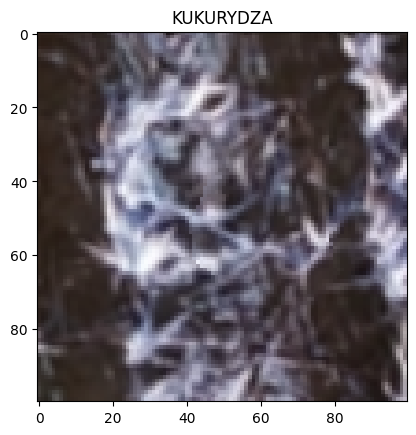

In [82]:
# Plotting example image

img_array = cv2.imread("C:/Users/Jakub/PycharmProjects/Cybertech/data/train/corn/tile_1100-8400.tif", cv2.IMREAD_UNCHANGED)
plt.imshow(np.real(img_array))
plt.title("KUKURYDZA")
plt.show()

In [83]:
# Declaring ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=5)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [84]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 2

train_data_kukurydza = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

test_data_kukurydza = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Found 94 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [85]:
model = Sequential()

#1
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (224, 224, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#3
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 112, 112, 8)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 56, 56, 16)       

In [86]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
    loss="BinaryCrossentropy",
    metrics=["accuracy"],
    )

In [87]:
from keras.callbacks import ModelCheckpoint

train_steps = train_data_kukurydza.samples // BATCH_SIZE
test_steps= test_data_kukurydza.samples // BATCH_SIZE

callback = ModelCheckpoint("best_model.hdf5",
                           monitor='val_loss',
                           verbose=1,
                           save_best_only=True,
                           mode='auto',
                           save_freq="epoch")

print(train_steps,  test_steps)

47 47


In [88]:
history = model.fit(
    train_data_kukurydza,
    steps_per_epoch=train_steps,
    epochs = 25,
    validation_data=test_data_kukurydza,
    validation_steps=test_steps,
    callbacks=[callback],
)

Epoch 1/25
47/47 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4787
Epoch 1: val_loss improved from inf to 0.69195, saving model to best_model.hdf5
47/47 [==============================] - 2s 39ms/step - loss: 0.6935 - accuracy: 0.4787 - val_loss: 0.6919 - val_accuracy: 0.5319
Epoch 2/25
45/47 [===========================>..] - ETA: 0s - loss: 0.6938 - accuracy: 0.4333
Epoch 2: val_loss improved from 0.69195 to 0.69053, saving model to best_model.hdf5
47/47 [==============================] - 2s 35ms/step - loss: 0.6938 - accuracy: 0.4468 - val_loss: 0.6905 - val_accuracy: 0.7021
Epoch 3/25
45/47 [===========================>..] - ETA: 0s - loss: 0.6936 - accuracy: 0.5444
Epoch 3: val_loss improved from 0.69053 to 0.68941, saving model to best_model.hdf5
47/47 [==============================] - 2s 35ms/step - loss: 0.6935 - accuracy: 0.5532 - val_loss: 0.6894 - val_accuracy: 0.5957
Epoch 4/25
44/47 [===========================>..] - ETA: 0s - loss: 0.6920 - acc